In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [18]:
df = pd.read_csv("../lab-eda-univariate/data/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1- Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [4]:
category_frequency_table = df['category'].value_counts().sort_values(ascending=False)

category_frequency_table.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2- Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: xlabel='category'>

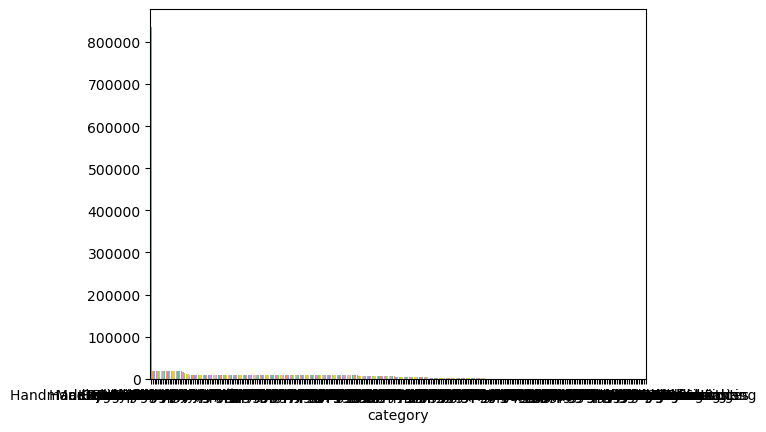

In [5]:
sns.barplot(x=category_frequency_table.index,
            y=category_frequency_table.values,
            palette= 'Set2'
)

In [6]:
top_category_frequency_table = category_frequency_table.head(5)

<Axes: xlabel='category', ylabel='count'>

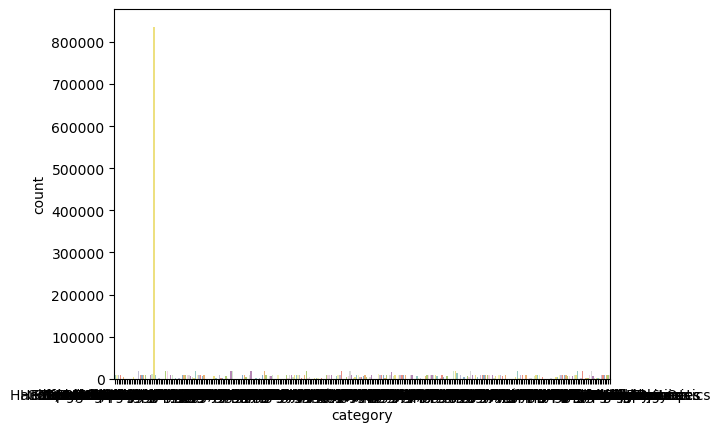

In [7]:
sns.countplot(data=df, x='category', palette="Set3")

<Axes: ylabel='count'>

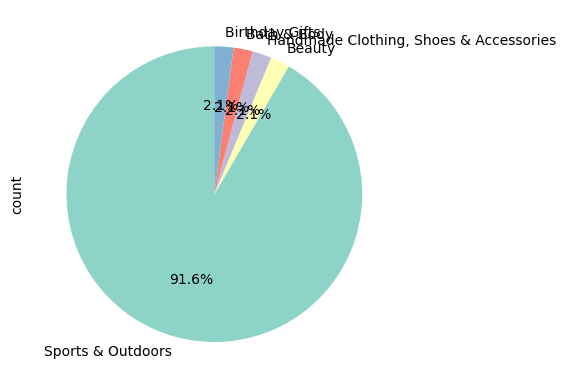

In [8]:
top_category_frequency_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

In [9]:
#Sports & Outdoors dominates the listing 

### Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1- Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [10]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()

mean_price.round(2), median_price, mode_price 

#Rounded average price is 89.24 for the products listed while most common price poin is 9.99. 
#The relatively high difference gives signs of asymetical destribution

(89.24,
 19.09,
 0    9.99
 Name: price, dtype: float64)

2-Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [11]:
variance_price = df['price'].var()
std_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
interquartile_price = df['price'].quantile(q= 0.75)-df['price'].quantile(q=0.25)

print(f"Varience = {variance_price}")
print(f"Standart Deviation = {std_price}")
print(f"Range = {range_price}")
print(f"Interquartile = {interquartile_price}")

#there is a clear difference between range and interquartile price which indicates an
#asymetrical distrubution of prices and possible outliers 


Varience = 119445.48532256528
Standart Deviation = 345.60886175352226
Range = 100000.0
Interquartile = 36.0


3-Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: >

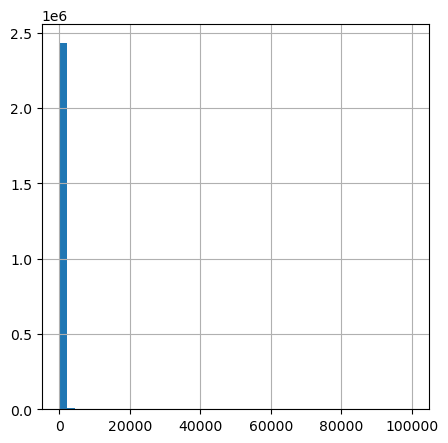

In [12]:
df['price'].hist(figsize = (5,5),
                 bins=45, 
                 xlabelsize=10, 
                 ylabelsize=10
)



<Axes: >

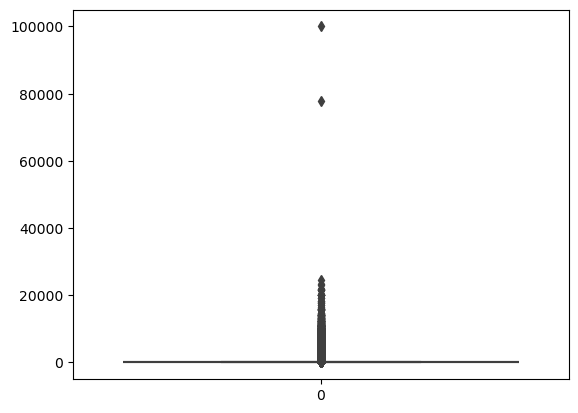

In [16]:
sns.boxplot(data = df['price']
)

#it seems like because of the extreme values of some products
#charts are not very readable 

### Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1- Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [47]:
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()

mean_stars, median_stars, mode_stars 
#seems like there a spike for the number of 0 star reviews 

(2.152836472966065,
 0.0,
 0    0.0
 Name: stars, dtype: float64)

2- Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [32]:
variance_stars = df['stars'].var()
std_stars = df['stars'].std()
range_stars = df['stars'].max() - df['stars'].min()
interquartile_stars = df['stars'].quantile(q= 0.75)-df['stars'].quantile(q=0.25)

print(f"Varience = {variance_stars}")
print(f"Standart Deviation = {std_stars}")
print(f"Range = {range_stars}")
print(f"Interquartile = {interquartile_stars}")

Varience = 4.81743402976196
Standart Deviation = 2.1948653785054697
Range = 5.0
Interquartile = 4.4


In [45]:
skew_star = df['stars'].skew()
kurt_star = df['stars'].kurtosis()

skew_star,kurt_star

#seems like data is symetrical like as skewness is 0.081 and does not have sharp peaks as kurtosis is below 3 

(0.08120735761080985, -1.9260061280432985)

3-Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: >

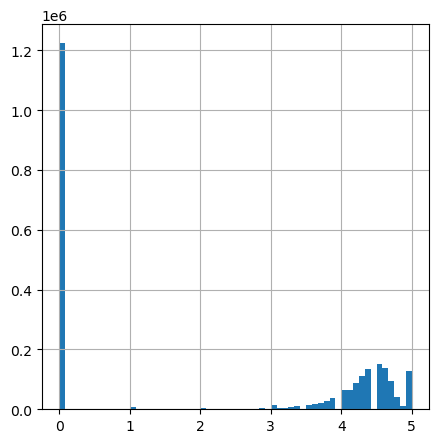

In [37]:
df['stars'].hist(figsize = (5,5),
                 bins=60, 
                 xlabelsize=10, 
                 ylabelsize=10
)



<Axes: >

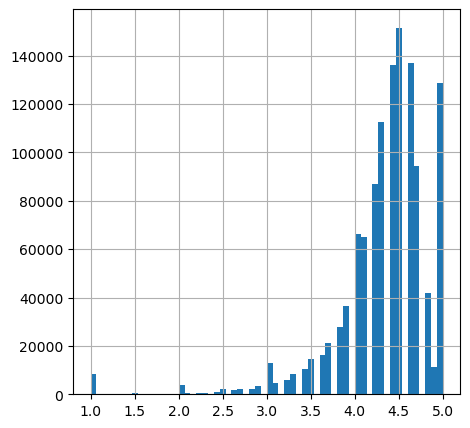

In [44]:
#dropping 0 values to have a look 

df2 = df[df['stars'] != 0]

df2['stars']
df2['stars'].hist(figsize = (5,5),
                 bins=60, 
                 xlabelsize=10, 
                 ylabelsize=10
)